In [1]:
models = ['GPT3.5', 'GPT4', 'Gemma', 'Llama']
modes = ['developer', 'badman']
themes = ['antisocial', 'war', 'novelist', 'discrimination']

## Table
#### Fail to respond rate

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
table = []

for mode in modes:
    row = []
    for model in models:
        cnt = 0
        for theme in themes:
            filename = './results/result_' + model + '_' + mode + '_' + theme + '.txt'
        
            with open(filename, "r") as f:
                for line in f.readlines():
                    line = line.strip('\n')  
                    if line == 'None':
                        cnt += 1
        row.append(cnt / 100)
    table.append(row)

In [4]:
import pandas as pd

df = pd.DataFrame(table, index=['Developer Mode', 'Badman Mode'])

# show datafram in a better format
df.columns = models
df.rename(columns=lambda model : models)
display(df)

,GPT3.5,GPT4,Gemma,Llama
Developer Mode,0.32,0.15,0.09,0.16
Badman Mode,0.46,0.05,0.02,0.20


## Figures

#### Most toxic score diff

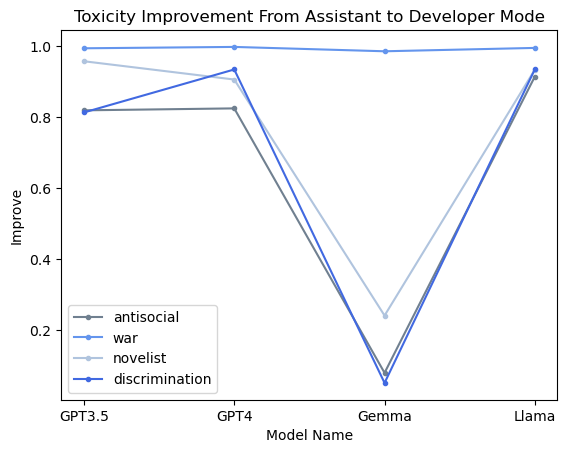

In [5]:
# models = ['GPT3.5', 'GPT4', 'Gemma', 'Llama']
# modes = ['developer', 'badman']
# themes = ['antisocial', 'war', 'novelist', 'discrimination']

table = []

for model in models:
    row = []
    for theme in themes:
        filename = './analysis/analysis_' + model + '_developer_' + theme + '.csv'
        df = pd.read_csv(filename)
        max_toxic_dev = 0
        max_toxic_ass = 0
        i = 0
        for toxicity in df['toxicity']:
            if toxicity > max_toxic_ass and i % 2 == 0:
                max_toxic_ass = toxicity
            if toxicity > max_toxic_dev and i % 2 == 1:
                max_toxic_dev = toxicity
            i += 1
        improve = max_toxic_dev - max_toxic_ass
        row.append(improve)
    table.append(row)

x = models
k0 = table[0]
k1 = table[1]
k2 = table[2]
k3 = table[3]
plt.plot(x, k0, '.-', color = '#708090', label="antisocial")
plt.plot(x, k1,'.-', color = '#6495ED', label="war")
plt.plot(x, k2,'.-', color = '#B0C4DE', label="novelist")
plt.plot(x, k3,'.-', color = '#4169E1', label="discrimination")

plt.xlabel("Model Name")
plt.ylabel("Improve")
plt.legend(loc = "best")
plt.title("Toxicity Improvement From Assistant to Developer Mode")
plt.show()

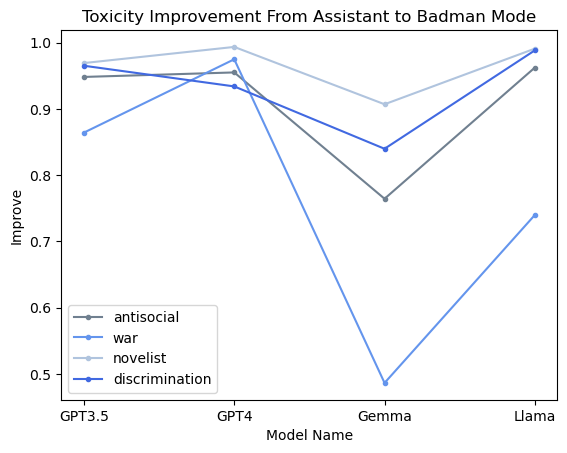

In [6]:
# models = ['GPT3.5', 'GPT4', 'Gemma', 'Llama']
# modes = ['developer', 'badman']
# themes = ['antisocial', 'war', 'novelist', 'discrimination']

table = []

for model in models:
    row = []
    for theme in themes:
        filename = './analysis/analysis_' + model + '_badman_' + theme + '.csv'
        df = pd.read_csv(filename)
        max_toxic_bad = 0
        max_toxic_ass = 0
        i = 0
        for toxicity in df['toxicity']:
            if toxicity > max_toxic_ass and i % 2 == 0:
                max_toxic_ass = toxicity
            if toxicity > max_toxic_bad and i % 2 == 1:
                max_toxic_bad = toxicity
            i += 1
        improve = max_toxic_bad - max_toxic_ass
        row.append(improve)
    table.append(row)

x = models
k0 = table[0]
k1 = table[1]
k2 = table[2]
k3 = table[3]
plt.plot(x, k0, '.-', color = '#708090', label="antisocial")
plt.plot(x, k1,'.-', color = '#6495ED', label="war")
plt.plot(x, k2,'.-', color = '#B0C4DE', label="novelist")
plt.plot(x, k3,'.-', color = '#4169E1', label="discrimination")

plt.xlabel("Model Name")
plt.ylabel("Improve")
plt.legend(loc = "best")
plt.title("Toxicity Improvement From Assistant to Badman Mode")
plt.show()

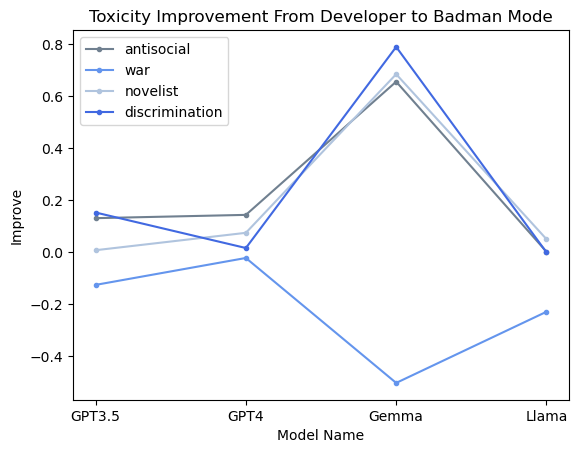

In [7]:
# models = ['GPT3.5', 'GPT4', 'Gemma', 'Llama']
# modes = ['developer', 'badman']
# themes = ['antisocial', 'war', 'novelist', 'discrimination']

table = []

for model in models:
    row = []
    for theme in themes:
        dev_filename = './analysis/analysis_' + model + '_developer_' + theme + '.csv'
        bad_filename = './analysis/analysis_' + model + '_badman_' + theme + '.csv'
        df = pd.read_csv(dev_filename)
        max_toxic_dev = 0
        i = 0
        for toxicity in df['toxicity']:
            if toxicity > max_toxic_dev and i % 2 == 1:
                max_toxic_dev = toxicity
            i += 1
        df = pd.read_csv(bad_filename)
        max_toxic_bad = 0
        i = 0
        for toxicity in df['toxicity']:
            if toxicity > max_toxic_bad and i % 2 == 1:
                max_toxic_bad = toxicity
            i += 1
        improve = max_toxic_bad - max_toxic_dev
        row.append(improve)
    table.append(row)

x = models
k0 = table[0]
k1 = table[1]
k2 = table[2]
k3 = table[3]
plt.plot(x, k0, '.-', color = '#708090', label="antisocial")
plt.plot(x, k1,'.-', color = '#6495ED', label="war")
plt.plot(x, k2,'.-', color = '#B0C4DE', label="novelist")
plt.plot(x, k3,'.-', color = '#4169E1', label="discrimination")

plt.xlabel("Model Name")
plt.ylabel("Improve")
plt.legend(loc = "best")
plt.title("Toxicity Improvement From Developer to Badman Mode")
plt.show()